<a href="https://colab.research.google.com/github/JairusTheAnalyst/JairusTheAnalyst/blob/main/AirQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Historical Air Quality Analysis Using the “AirQualityUCI” Dataset**

**Project Overview**

This mini-project focuses on analyzing historical air quality data using the “AirQualityUCI” dataset. The dataset contains detailed atmospheric pollution measurements and environmental parameters recorded in Milan, Italy, over time. By leveraging data science tools and methodologies, this project aims to uncover pollution trends, evaluate air quality patterns, and assess the effectiveness of environmental policies.

**Objective**
- To investigate air pollution levels across various time intervals (daily, monthly, yearly).

- To identify long-term trends and patterns in air quality.

- To assess the correlation between pollutants and environmental factors like temperature and humidity.

- To derive insights that can support environmental health decisions and policy recommendations.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [13]:
AirQuality=pd.read_csv("/content/drive/MyDrive/DATASETS/AirQualityUCI.csv")
AirQuality.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
5,10-03-2004,23:00:00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,NaN,NaN
6,11-03-2004,00:00:00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603,NaN,NaN
7,11-03-2004,01:00:00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702,NaN,NaN
8,11-03-2004,02:00:00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648,NaN,NaN
9,11-03-2004,03:00:00,0.6,1010.0,19.0,1.7,561.0,-200.0,1705.0,-200.0,1235.0,501.0,10.3,60.2,0.7517,NaN,NaN


**Dataset Characteristics**

- Source: Network of air quality sensors in Milan, Italy.

- Instances: 9,358 time-stamped samples.

- Features: 15 air quality and environmental attributes.


| Feature         | Description                                 |
| --------------- | ------------------------------------------- |
| `Date`, `Time`  | Timestamps for each observation             |
| `CO(GT)`        | Carbon Monoxide concentration (µg/m³)       |
| `PT08.S1(CO)`   | NMHC sensor response (µg/m³)                |
| `C6H6(GT)`      | Benzene concentration (µg/m³)               |
| `PT08.S2(NMHC)` | NO2 concentration (µg/m³)                   |
| `PT08.S3(SO2)`  | SO2 concentration (µg/m³)                   |
| `PT08.S4(NO2)`  | Ozone concentration (µg/m³)                 |
| `PT08.S5(O3)`   | PM10 concentration (µg/m³)                  |
| `T`, `Tdew`     | Temperature and dew point (°C)              |
| `RH`, `AH`      | Relative and absolute humidity (%) / (g/m³) |
| `NOx`, `PM10`   | Nitrogen oxides and particulate matter      |


**Data Preprocessing**

In [5]:
print("Missing values:")
AirQuality.isnull().sum()

Missing values:


,0
Date,114
Time,114
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114


In [4]:
AirQuality=AirQuality.dropna(how='all', axis=1)

In [6]:
# Replace -200 with NaN
AirQuality.replace(-200, np.nan, inplace=True)

# Convert 'Date' and 'Time' to datetime format
AirQuality['Datetime'] = pd.to_datetime(
    AirQuality['Date'] + ' ' + AirQuality['Time'],
    errors='coerce',
    dayfirst=True
)


In [7]:
# Drop original Date and Time columns
AirQuality.drop(columns=['Date', 'Time'], inplace=True)

# Drop rows where all key pollutant and sensor readings are missing
AirQuality.dropna(
    how='all',
    subset=[
        'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
        'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
        'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'
    ],
    inplace=True
)

# Interpolate missing values linearly
AirQuality.interpolate(method='linear', inplace=True)


In [8]:
# Set Datetime as the index
AirQuality.set_index('Datetime', inplace=True)

# Optional: sort index
AirQuality.sort_index(inplace=True)

# Preview cleaned data
print(AirQuality.head())

                     CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
Datetime                                                                      
2004-03-10 18:00:00     2.6       1360.0     150.0      11.9         1046.0   
2004-03-10 19:00:00     2.0       1292.0     112.0       9.4          955.0   
2004-03-10 20:00:00     2.2       1402.0      88.0       9.0          939.0   
2004-03-10 21:00:00     2.2       1376.0      80.0       9.2          948.0   
2004-03-10 22:00:00     1.6       1272.0      51.0       6.5          836.0   

                     NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
Datetime                                                            
2004-03-10 18:00:00    166.0        1056.0    113.0        1692.0   
2004-03-10 19:00:00    103.0        1174.0     92.0        1559.0   
2004-03-10 20:00:00    131.0        1140.0    114.0        1555.0   
2004-03-10 21:00:00    172.0        1092.0    122.0        1584.0   
2004-03-10 22:00:00    131.0    

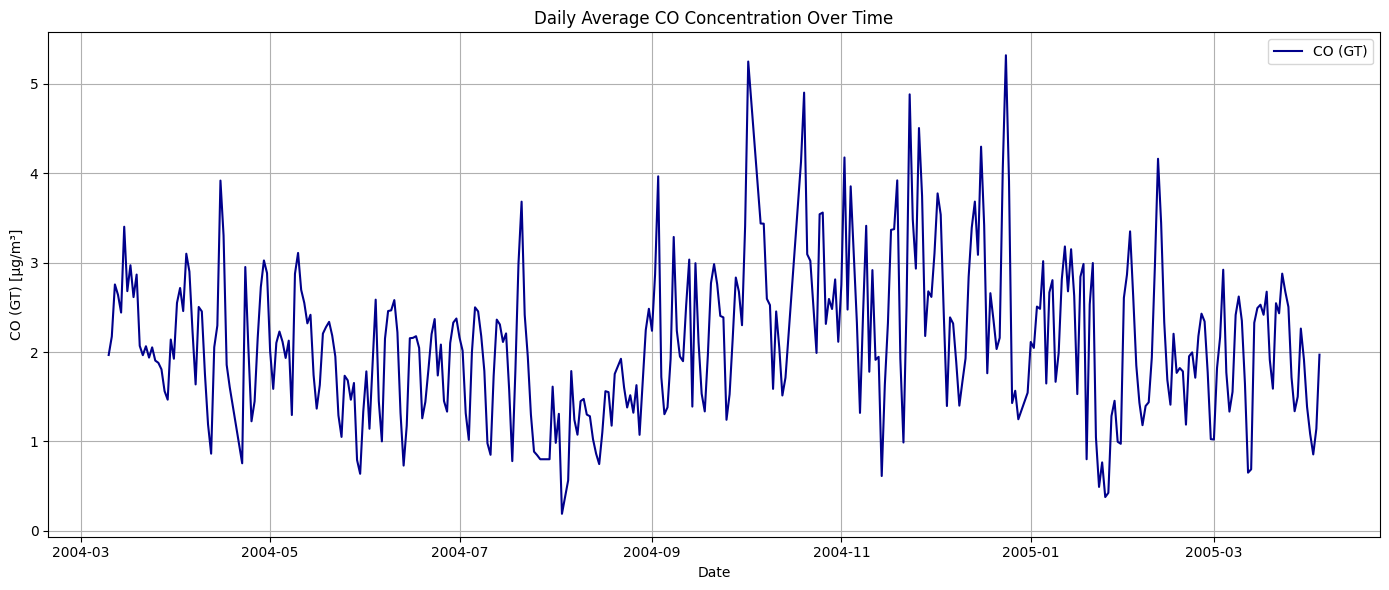

In [9]:
# Resample to daily averages
daily_avg = AirQuality.resample('D').mean()

# Plot CO(GT) daily trend
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(daily_avg.index, daily_avg['CO(GT)'], label='CO (GT)', color='darkblue')
plt.title('Daily Average CO Concentration Over Time')
plt.xlabel('Date')
plt.ylabel('CO (GT) [µg/m³]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


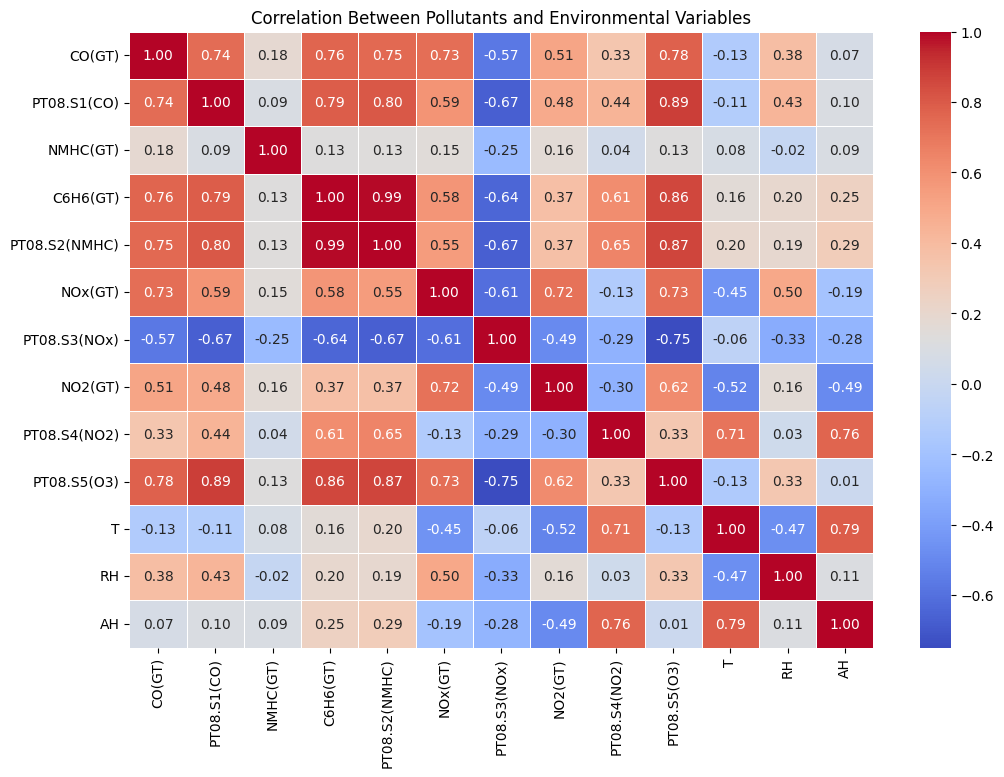

In [10]:
import seaborn as sns

# Compute correlation matrix
corr_matrix = daily_avg.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Pollutants and Environmental Variables')
plt.show()


The heatmap of **"Correlation Between Pollutants and Environmental Variables"** provides insights into the relationships between various air pollutants and environmental factors. The data reveals several strong, moderate, and weak correlations among these variables.

A number of pollutants show strong positive relationships. For instance, carbon monoxide (CO(GT)) is strongly correlated with sensor PT08.S1(CO), benzene (C6H6(GT)), and PT08.S2(NMHC), with correlation coefficients around 0.74 to 0.76. This suggests these pollutants tend to rise and fall together, likely due to shared sources such as vehicle emissions or industrial activity. Additionally, C6H6(GT) and PT08.S2(NMHC) exhibit an almost perfect correlation (r = 0.99), indicating they are closely linked and may originate from the same emission sources.

Sensor PT08.S5(O3), which relates to ozone levels, also shows strong correlations with PT08.S1(CO), PT08.S2(NMHC), and C6H6(GT), with coefficients ranging from 0.86 to 0.89. These associations may reflect secondary pollutant formation processes influenced by precursor emissions. Furthermore, temperature (T) and absolute humidity (AH) are positively correlated (r = 0.79), as would be expected in atmospheric systems where warmer air can hold more moisture.

In contrast, several strong negative correlations are observed, particularly involving sensor PT08.S3(NOx), which measures nitrogen oxides. It exhibits significant negative relationships with CO(GT), PT08.S1(CO), C6H6(GT), and PT08.S2(NMHC), with coefficients around -0.57 to -0.67. Notably, PT08.S3(NOx) is negatively correlated with PT08.S5(O3) (r = -0.70), potentially reflecting the chemical interaction between ozone and nitrogen oxides in the atmosphere.

Moderate correlations also exist, such as between NOx(GT) and NO2(GT) (r = 0.72), suggesting a reasonable level of consistency between the two nitrogen-based pollutants. Temperature also shows a moderate positive correlation with PT08.S4(NO2), indicating a possible environmental influence on NO2 levels.

Finally, weak or negligible correlations are observed for some variables. For example, NMHC(GT) has generally weak relationships with other pollutants and sensors, and relative humidity (RH) does not show strong correlation with most variables, suggesting its limited direct influence on pollutant concentrations in this dataset.

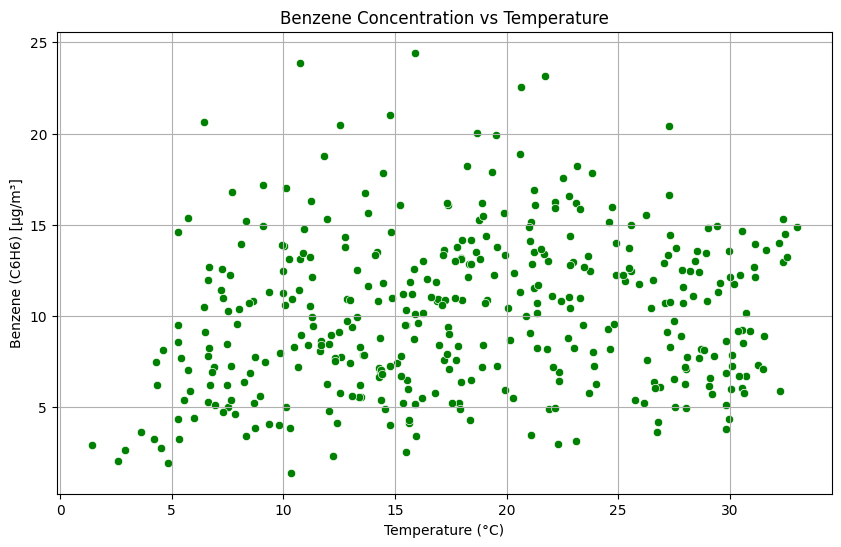

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=daily_avg, x='T', y='C6H6(GT)', color='green')
plt.title('Benzene Concentration vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Benzene (C6H6) [µg/m³]')
plt.grid(True)
plt.show()
